In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
import pickle

In [16]:
data1=pd.read_csv('Admission_Predict.csv')
data2=pd.read_csv('Admission_Predict_Ver1.1.csv')
data=data1.append(data2)
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


# Getting to know more about the data 

In [17]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,228.277778,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,134.674991,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,113.000000,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,338.000000,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [18]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [19]:
len(data.columns)

9

#### Points to remember
1. there are 900 data points
2. there is no missing values ( Good!!)
3. there are 9 columns 
4. we need to remove serial number, as it is not useful for prediction

# Univariate analysis

the numerical values are gre score, tofel score,Chance of Admit,CGPA
the rest ( University Rating,SOP,LOR,Research)

In [20]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [21]:
data.shape

(900, 9)

This shows the following:
1. there are 9 columns( 8 independent and 1 independent)
2. In the 8 columns, there is no meaning attainable from the Serial number

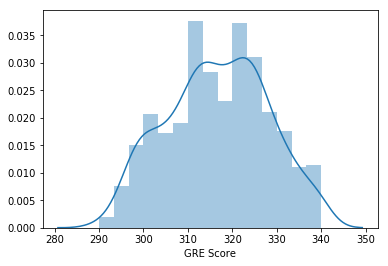

In [22]:
sns.distplot(data['GRE Score']); 

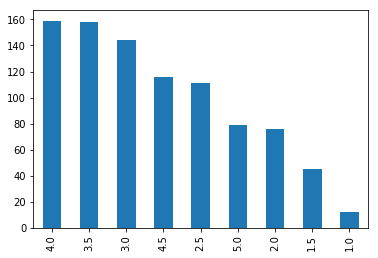

In [23]:
data['SOP'].value_counts().plot.bar()

In [24]:
# Prediction

In [25]:
data = data.drop(['Serial No.'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 0.06352164985262898
Linear Regression : 0.05322544351845007
RandomForest : 0.048772943319016535
KNeighbours : 0.06980130530457308
SVM : 0.08020516681455948
AdaBoostClassifier : 0.06274523197026086
GradientBoostingClassifier:  0.04926254441818099
Xgboost:  0.05127776666323234
CatBoost:  0.042694183986987835
Lasso:  0.12212894598049569
Ridge:  0.05323232105123489
BayesianRidge:  0.05324610367598508
ElasticNet:  0.09209136880586556
HuberRegressor:  0.06285442541430268


#### several iterations have shown random forest and cat boost of having lower mean_sqared_error

In [28]:
model = CatBoostRegressor(logging_level='Silent')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('CatBoost: ', (np.sqrt(mean_squared_error(y_test, predictions))))

CatBoost:  0.042694183986987835


In [29]:
pickle.dump(model, open('model.pkl','wb'))